## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
unique_users

290584

d. The proportion of users converted.

In [5]:
# count converted users
converted_users = df.query('converted == 1').count()[0]
converted_users

35237

In [6]:
# get proportion of unique users converted
converted_users / unique_users

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# treatment = number of group is treatment and landingpage is not new page
# new_page = number of group is not treatment and landingpage is new page
treatment = df.query('group == "treatment" and landing_page != "new_page"').count()[0]
new_page = df.query('group != "treatment" and landing_page == "new_page"').count()[0]

# add treament und new_page to get number of times both dont match
treatment + new_page

3893

f. Do any of the rows have missing values?

In [8]:
df.info()
# no rows have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# store all entries as df2 where 
# group is control and landing page is old 
# or where group is treatment and landing page is new

df2 = df.query('group == "control" and landing_page == "old_page" | group == "treatment" and landing_page == "new_page"')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# count of user_ids
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep = False)]
# user_id is 773192

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# the row information is shown in b.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset=['user_id'])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').user_id.nunique() / df.user_id.nunique()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Right now, there is based on our data not sufficient evidence that the new treatment page leads to more conversions. The conversion rate of the treatment group is below the conversion rate of the control group, although almost 50% of the visitors received the new page. However, the differences between the conversion rates are very small and might therefore be neglected.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \le 0$$


$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.00010539757341325451

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
size = 10000
new_page_converted_simulation = np.random.binomial(n_new, p_new, size) / n_new 
old_page_converted_simulation = np.random.binomial(n_old, p_old, size) / n_old 
p_diffs = np.array(new_page_converted_simulation - old_page_converted_simulation)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

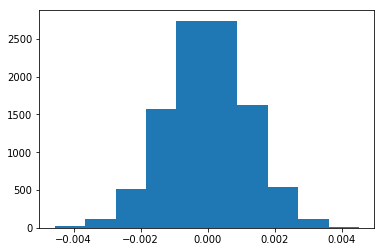

In [27]:
plt.hist(p_diffs);

The histogram looks like expected, because the Central Limit Theorem states 
that with large enough samples sizes the mean will follow a normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# find mean for p_new - p_old for observed values
new_page_converted_obs = df2.query('landing_page == "new_page"')['converted'].mean()
old_page_converted_obs = df2.query('landing_page == "old_page"')['converted'].mean()
obs_diffs = new_page_converted_obs - old_page_converted_obs

In [29]:
# 10000 draws from the sampling distribution under the null
null_mean = 0 
p_diffs_std = np.std(p_diffs)
null_vals = np.random.normal(null_mean, p_diffs_std, size)

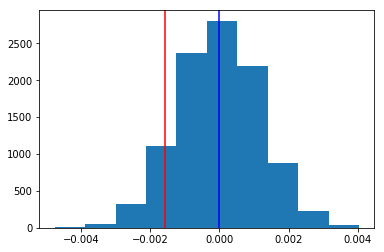

In [30]:
# sampling distribution under the null
plt.hist(null_vals);
plt.axvline(null_mean, color = 'blue'); # mean of null dist
plt.axvline(obs_diffs, color = 'red'); # where observation difference falls on null dist

In [31]:
# calcuclate p value
p_val = (null_vals > obs_diffs).mean()
p_val

0.90559999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In j. we first conclude the observed difference between p_new and p_old from the given data set. We do that, because in hypothesis testing we simulate the null distribution and then compare it to the observed statistic in order to decide if we reject our null hypothesis or not. 

Then we simulate the null distribution, a simulated distribution where the null hypothesis is true. The null distribution is based on our sample distribution (craeted in h. and i.). To create the null distribution we use the null mean, the standard deviation of our sample distribution and the size of our sample distribution.

Since our alternative hypothesis is p_new - p_old > 0, the probability that our observerd difference comes from the null distribution is the shaded area to the right of our observed difference. That almost 3/4 of the shaded area is on the right suggests that our observed difference is from the null distribution and therefore we cannot reject our null hypothesis.

To get statistical significance of the observed difference, we calculate the p-value. The p-value is the probability of obtaining the observed statistic or a more extreme value in favour of the alternative hypothesis if the null hypothesis is true. Hence, the p-value tells us the probability of committing a Type I error if the null hypothesis is true. A type I error is when we incorrectly reject the null hypothesis. 

Our given type I error rate for this AB test is 5%. A p-value of 0.05 means, that there is a 5% chance that our observed difference comes from a distribution where the null hypothesis is true. When our p_value is smaller than 0.05 we reject the null hypothesis, because we assume that the observed difference comes from a distribution where the alternative hypothesis is true. 

In j. we calculate the p-value where the proportion of differences in the null distribution is greater than the actual difference observed in our given data set. Since our p-values is high (0.9 > 0.05) we cannot reject our null hypothesis. Therefore, we do not have statistically significent evidence that the new page converts better and assume that the old page converts the same or even better than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value in l. has nearly the same value as the p-value in j. The z-score is the number of standard deviations a given data point lies above or below the mean. Our z-score implies, that our observed statistic is -1.31 standard deviations below the null mean. 

Therefore, this findings agree with our findings in j. and k. Since our type I error is 0.05, we have no statistical significance to reject the null hypothesis giving a p-value of 0.9. Moreover, our z-score shows that our observed statistic is very close to the null mean, which also indicates that we do not have statistical significance to reject the null hypothesis.

A low z-value and a high p-value suggest that the old page has a slightly better conversion rate than the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we want to know if a user converted (1) or not (0) - binary outcome, categorical variables - on the landing page type, we should use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
# need to import to reject errors
# source https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lr = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lr.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        19:46:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br>

The null and alternative hypothesis for our regression model:

$$H_0: p_{new} - p_{old} = 0$$


$$H_1: p_{new} - p_{old} \neq 0$$


The p-value associated with ab_page is 0.190. The p-value differs from the value in Part II because in our regression model we examine whether there is a difference in conversion rates. While in Part II we examined whether one conversion rate is equal or greater/lesser than the other.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Usually, it's not just the page that determines whether a user converts or not. In our example, the landing page seems to have little impact on the conversion rate.

There are often other factors that also need to be taken into account. Therefore, it is a good idea to include other factors in the regression model. For example, the end device plays an important role. Does the user navigate to the landing page with his smartphone or is she using her PC? Other influencing factors are, for example, date and time. Do users convert during the day or at night? Do more users convert during the week or on weekends? Sociodemographic data such as age, gender, city or country are also interesting.

However, there are also disadvantages when other factors are included in the regression model. For example, a major disadvantage is multicollinearity, a condition in which some of the variables are highly correlated. This can lead to to flipped regression coefficients from the expected relationship and inaccurate hypothesis results. To identify mulicollineartiy we can look at the the correlation of each explanatory variable with each other explanatory variable (scatterplos matrix) or we can look at VIFs (VIF > 10 = multicollinearity) for each variable. A common way of working with correlated explanatory variables is to remove one of the variables that is most related to the other variables. 

Another disadvantage are higher order terms, which are created when two ore more x-variables are multiplyed by one another. Commonly, higher order terms include quadratics, cubics or interactions. Higher order terms are useful to  fit more complex relationships into a data set. But they also take away the ease of interpreting coefficients. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# read csv and store it as df_countries
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# merge df2 and df_countries as df3
df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'), how='inner')
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [39]:
# show unique countries
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [40]:
# create intercept and dummies variables for US, CA and UK
df3['intercept'] = 1
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [41]:
# create linear regression with US as baseline
lr2 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results2 = lr2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               1.521e-05
Time:                        19:46:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [42]:
# using exp to convert coef into odds ratios and compute reciprocal
1/np.exp(-0.0408), np.exp(0.0099) 

(1.0416437559600236, 1.0099491671175422)

Users from CA convert 1.04 times less than users from the US.
Users from UK convert 1.01 times more often than users from the US.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# creating interactions for new page and country
df3['CA_new_page'] = df3['CA'] * df3['ab_page']
df3['UK_new_page'] = df3['UK'] * df3['ab_page']
df3['US_new_page'] = df3['US'] * df3['ab_page']
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_new_page,UK_new_page,US_new_page
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [44]:
# create linear regression with US_new_page as baseline
lr3 = sm.Logit(df3['converted'], df3[['intercept', 'CA_new_page', 'UK_new_page']])
results3 = lr3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               2.364e-05
Time:                        19:46:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_new_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_new_page     0.0149      0.017      0.862      0.389      -0.019       0.049
===============================================================================
"""

In [45]:
# using exp to convert coef into odds ratios and compute reciprocal
1/np.exp(-0.0752), np.exp(0.0149)

(1.0780997492739288, 1.0150115583846535)

Users from CA convert on the new page 1.08 times less than users from the US.
Users from UK convert on the new page 1.02 times more often than users from the US.

<a id='conclusion'></a>
### Conclusion

Based on the given data, we have no observed or statistically significant evidence that the new landing page performs better than the old landingpage. In fact, we have a fairly high p-value and a relatively small z-value, indicating that the old page actually performs slightly better than the new page. Even when other variables, such as country, are taken into account, there are no statistically significant differences between the conversion rate of the old and the new landing page. 

Over 290,000 users in the initial data and a simulation size of 10000, the evaluated data set is sufficiently large. A continuation of the experiment is therefore not necessary. Whether the new page should be introduced or the old page should be retained cannot therefore be answered adequately on the basis of statistical findings alone. While the old page may perform slightly better, this difference is most likely marginal. 

Therefore, practical reasons should be used in the first place to make a decision. For example: Is it more expensive to implement the new site rather than keep the old one? Should users be offered a new experience or should old patterns be retained? 

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0